In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Analysis.Footprint as footp
import BBStudies.Plotting.BBPlots as bbplt

class tmp():
    def __init__(self,df):
        self.df = df

        # Footprint info
        self._tunes    = None
        self._tunesMTD    = 'pynaff'
        self._oldTunesMTD = 'pynaff'

    @property
    def tunes(self):
        # Reset if method is changed
        if self._tunesMTD != self._oldTunesMTD:
            self._tunes = None

        if self._tunes is None:
            if self._tunesMTD == 'pynaff':
                self._oldTunesMTD = 'pynaff'
                self._tunes    = self.df.groupby('particle').apply(lambda _part: pd.Series({'Qx':footp.NAFF_tune(_part['x']),'Qy':footp.NAFF_tune(_part['y'])}))
            if self._tunesMTD == 'fft':
                self._oldTunesMTD = 'fft'
                self._tunes    = self.df.groupby('particle').apply(lambda _part: pd.Series({'Qx':footp.FFT_tune(_part['x']),'Qy':footp.FFT_tune(_part['y'])}))

        return self._tunes

tracked     = tmp(pd.read_pickle('tmp_footprint_data.pkl'))
coordinates = pd.read_pickle('tmp_coordinates_data.pkl')

(0.295, 0.34500000000000003)

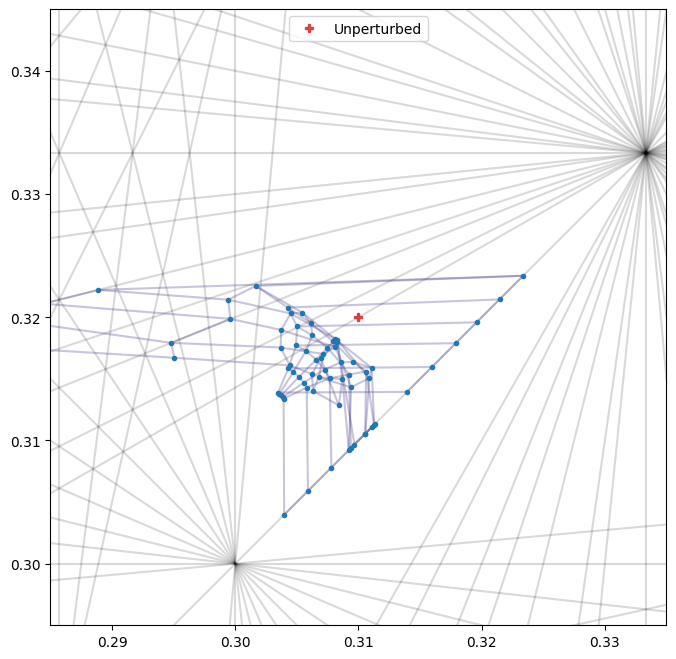

In [2]:

Qx_0,Qy_0 = 0.31,0.32
window    = 0.05
Qx_lim    = [Qx_0-window/2,Qx_0+window/2]
Qy_lim    = [Qy_0-window/2,Qy_0+window/2]

plt.figure(figsize=(8,8))
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
tracked._tunesMTD = 'pynaff'
bbplt.polarmesh(tracked.tunes['Qx'],tracked.tunes['Qy'],r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(tracked.tunes['Qx'],tracked.tunes['Qy'],'.')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')


plt.legend()
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)

In [5]:
_Qx

'Qx'

In [3]:
import PyNAFF
import NAFFlib



Tune,		Amplitude
0.309384, +0.000409+0.000029i
Tune,		Amplitude
0.309384, +0.000080-0.000081i


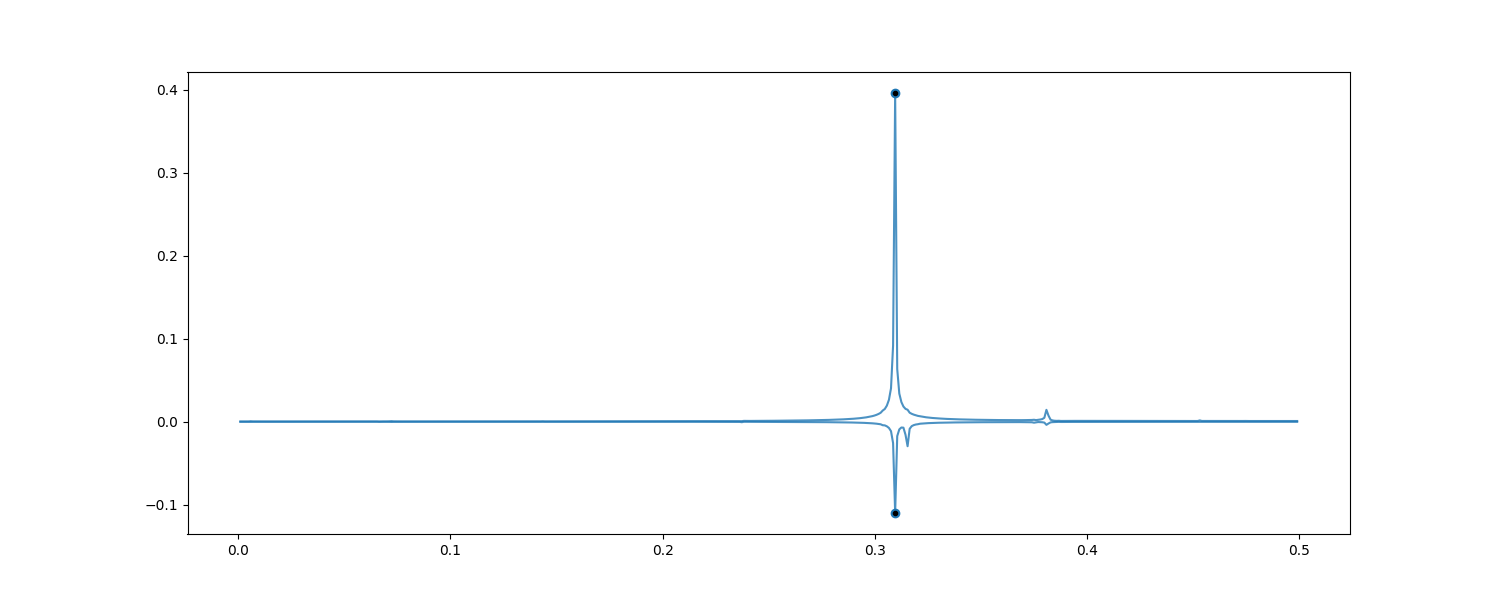

In [26]:
%matplotlib widget

plt.figure(figsize=(15,6))
for _ID in [3]:#[50,52,60,62,69]:
    _part = tracked.df.groupby('particle').get_group(_ID)
    freqx,spectx = bbplt.FFT(_part.x,flipped=False,alpha=0.8,unpack=True)
    thisColor = plt.gca().lines[-1].get_color()
    freqy,specty = bbplt.FFT(_part.y,flipped=True,alpha=0.8,unpack=True,color=thisColor)

    _Qx,_Qy = tracked.tunes.loc[_ID,['Qx','Qy']]
    plt.plot(freqx[np.argmin(np.abs(_Qx-freqx))],spectx[np.argmin(np.abs(_Qx-freqx))],'o',color=thisColor)
    plt.plot(freqy[np.argmin(np.abs(_Qy-freqy))],-specty[np.argmin(np.abs(_Qy-freqy))],'o',color=thisColor)

    q, A = NAFFlib.get_tunes_all(np.array(_part.x),3)
    A = A[q>0]
    q = q[q>0]
    print('Tune,\t\tAmplitude') 
    order = np.argsort(np.abs(A))

    for i in order:
        print('{0:.6f}, {1:+.6f}{2:+.6f}i'.format(q[i], A[i].real, A[i].imag))
        plt.plot(q[i],np.max(spectx)*(i+1)/len(q),'.',color='k')

    q, A = NAFFlib.get_tunes_all(np.array(_part.y),3)
    A = A[q>0]
    q = q[q>0]
    print('Tune,\t\tAmplitude') 

    order = np.argsort(np.abs(A))

    for i in order:
        print('{0:.6f}, {1:+.6f}{2:+.6f}i'.format(q[i], A[i].real, A[i].imag))
        plt.plot(q[i],-np.max(specty)*(i+1)/len(q),'.',color='k')
